In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

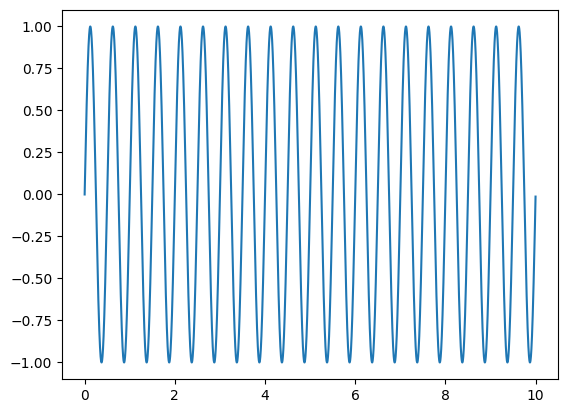

In [2]:
fs = 1000
w = 2

t = np.arange(0, 10, 1/fs)
sin = np.sin(2*np.pi*w*t)
noise = np.random.randn(len(t))*0.4
#sin =  noise

plt.plot(t, sin)
plt.show()

In [3]:
def recurrence_plot(time_series, epsilon=None):
    """
    Generates and displays a recurrence plot for a given time series.

    Parameters:
    - time_series: 1D array-like
        The input time series data.
    - epsilon: float, optional
        Threshold for recurrence. If None, it's set to 10% of the standard deviation of the time series.

    Returns:
    - Recurrence matrix (numpy array)
    """
    time_series = np.array(time_series)
    N = len(time_series)

    # Set default threshold if not provided
    if epsilon is None:
        epsilon = 0.1 * np.std(time_series)

    # Compute recurrence matrix
    R = np.abs(time_series[:, None] - time_series[None, :]) < epsilon

    
    return R

In [4]:
RP = recurrence_plot(sin)

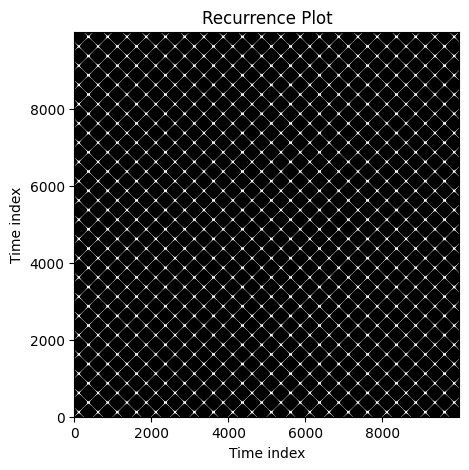

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(RP, cmap='grey', origin='lower')
plt.xlabel("Time index")
plt.ylabel("Time index")
plt.title("Recurrence Plot")
plt.show()

In [6]:

%matplotlib inline

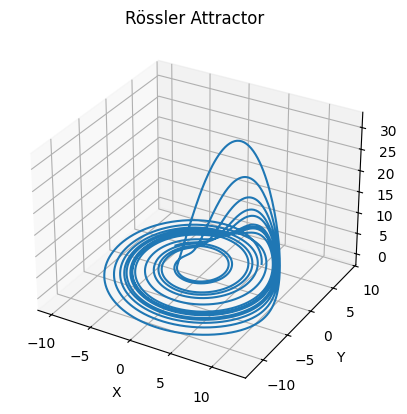

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the Rössler system
def rossler_system(state, t, a, b, c):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial state
initial_state = [5.0, 5.0, -2.0]

# Time points
t = np.linspace(0, 100, 10000)

# Solve the system of differential equations
solution = odeint(rossler_system, initial_state, t, args=(a, b, c))

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.show()


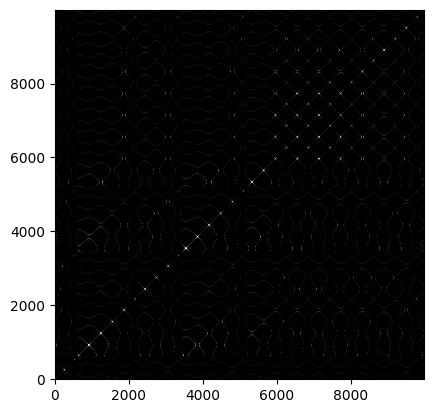

In [8]:
plt.imshow(recurrence_plot(solution[:, 0], 0.065), cmap='gray', origin='lower')

In [9]:
from pyunicorn.timeseries import RecurrencePlot


Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


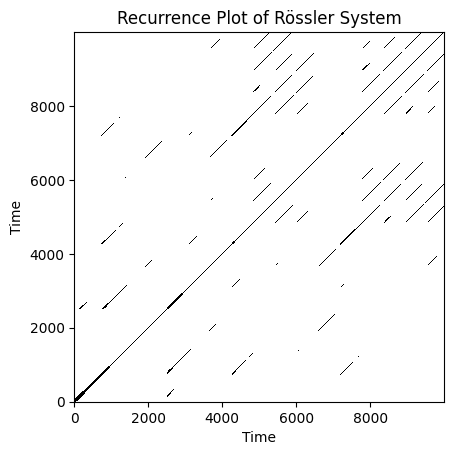

In [10]:
def rossler_system(state, t, a, b, c):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial state
initial_state = [1.0, 1.0, 1.0]

# Time points
t = np.linspace(0, 100, 10000)

# Solve the system of differential equations
solution = odeint(rossler_system, initial_state, t, args=(a, b, c))

# Extract the signals
x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]



# Combine the signals into a single array
signals = np.vstack((x, y, z)).T

# Create the recurrence plot
rp = RecurrencePlot(signals, threshold=1, tau=1, epsilon='distance', metric='euclidean')

# Plot the recurrence plot
plt.imshow(rp.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rössler System')
plt.xlabel('Time')
plt.ylabel('Time')
plt.show()

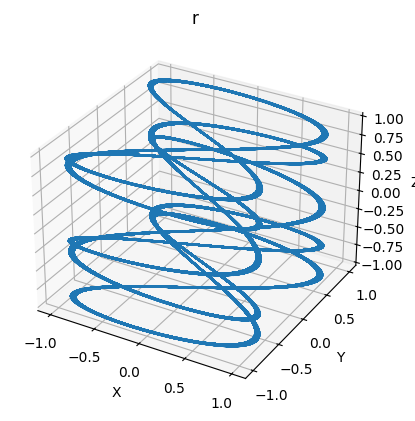

In [11]:
w = 10
x = np.sin(2*np.pi*w*t + 1)
w = 5
y = np.sin(2*np.pi*w*t - 1)
w = 1
z = np.sin(2*np.pi*w*t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('r')
plt.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


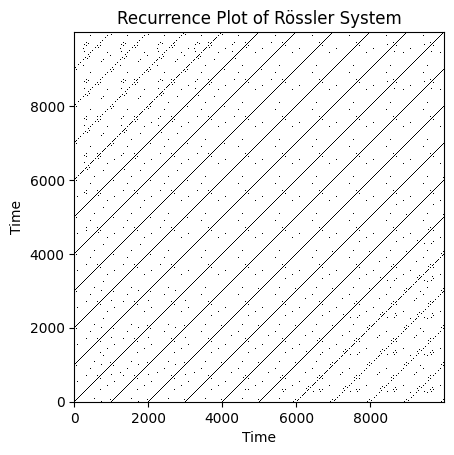

In [12]:
signals = np.vstack((x, y, z)).T

e = np.std(signals) * 0.5

rp = RecurrencePlot(signals, threshold=e, tau=5, epsilon='distance', metric='euclidean')

# Plot the recurrence plot
plt.imshow(rp.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rössler System')
plt.xlabel('Time')
plt.ylabel('Time')
plt.show()

In [13]:
%matplotlib inline

In [14]:
import plotly.express as px
import plotly.graph_objects as go
import ntwktools as nt

In [132]:
df = pd.read_csv(r"C:\Users\fercy\OneDrive\Escritorio\InternadoFMM\Pruebas%20BCI\SeñalesProcesadas10Hz2\MauricioServin\S3\10deTorquePre.csv")
df.head()

HRV        RRV   EnvAnta    EnvAgo      Torque     Posicion  \
0  105.341300  19.824662  0.227941  0.042612 -665.447241  4814.438017   
1  103.928908  20.090700  0.330807  0.118228 -724.300739  4962.332591   
2  102.866105  20.359095  0.635856  0.428001 -670.739165  4946.668326   
3  102.105658  20.629485  0.548160  0.163740 -710.387050  4969.460804   
4  101.600334  20.901513  0.186227  0.171366 -690.552627  4962.343922   

   Binaria  alfa_FC3    mu_FC3  beta_FC3  ...   beta_O1  gamma_O1   alfa_Oz  \
0      0.0  0.025547  0.009124  0.038164  ...  0.074733  0.353325  0.043213   
1      0.0  0.019367  0.009922  0.054869  ...  0.084742  0.403305  0.033045   
2      0.0  0.016765  0.011109  0.082163  ...  0.110760  0.397939  0.022612   
3      0.0  0.024450  0.017809  0.119385  ...  0.153838  0.371444  0.017570   
4      0.0  0.046424  0.037197  0.155549  ...  0.197187  0.375359  0.017743   

      mu_Oz   beta_Oz  gamma_Oz   alfa_O2     mu_O2   beta_O2  gamma_O2  
0  0.052244  0.084993  0.311057  0.076113  0.050664  0.080351  0.202674  
1  0.037126  0.092118  0.301003  0.063236  0.049718  0.097595  0.282759  
2  0.021036  0.123168  0.283280  0.036420  0.032875  0.115007  0.355420  
3  0.015745  0.167058  0.296263  0.026536  0.021223  0.126766  0.363925  
4  0.017049  0.183413  0.310033  0.033542  0.022905  0.139163  0.385251  

[5 rows x 71 columns]

(2406,)


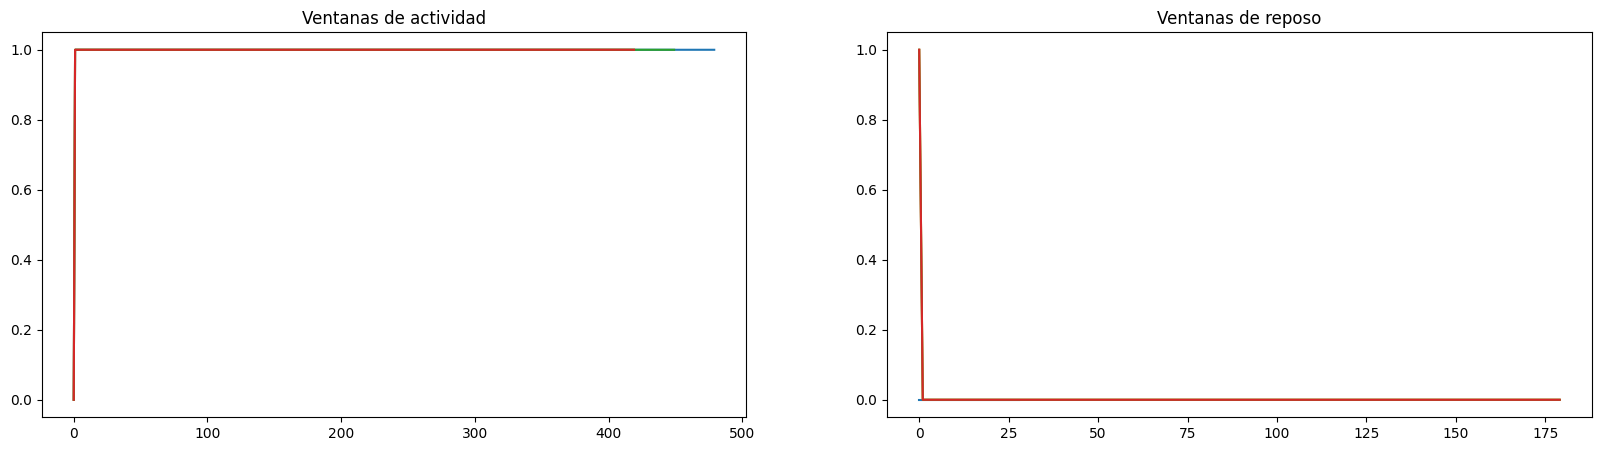

In [133]:
act, rep  = nt.obtener_win(df.Binaria.values, df.Binaria.values, siPlot=True)

In [ ]:

c, d = rep[1]
N = d - c
a, b = act[2]
a, b, = a + N//2, a + N//2 + N



x_A = df.gamma_C2[a:b].values
y_A = df.gamma_FC4[a:b].values
z_A = df.gamma_CP3[a:b].values



z_A = np.arange(0, b -a, 1/10)


x_R = df.gamma_C2[c:d].values
y_R = df.gamma_FC4[c:d].values
z_R = df.gamma_CP3[c:d].values


z_R = np.arange(0, d -c, 1/10)
# x_A = df.gamma_FC4[a:b].values
# y_A = df.gamma_FCz[a:b].values
# z_A = df.gamma_FC3[1675:b].values

# x_R = df.gamma_FC4[c:d].values
# y_R = df.gamma_FCz[c:d].values
# z_R = df.gamma_FC3[c:d].values

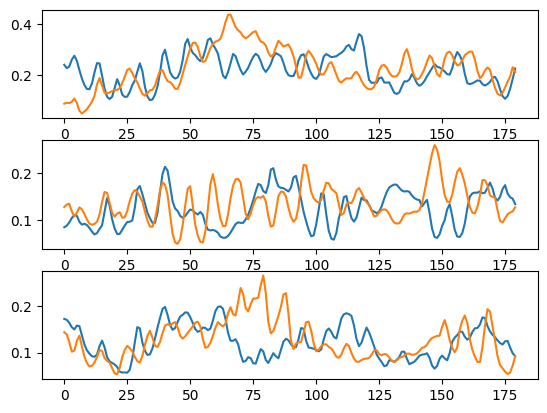

In [211]:
plt.subplot(3, 1, 1)
plt.plot(x_A)
plt.plot(x_R)

plt.subplot(3, 1, 2)
plt.plot(y_A)
plt.plot(y_R)

plt.subplot(3, 1, 3)
plt.plot(z_A)
plt.plot(z_R)

plt.show()


In [212]:

import plotly.graph_objects as go

# Create the 3D plot
fig = go.Figure()

# Add the first line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_A,
    y=y_A,
    z=z_A,
    mode='lines+markers',
    name='Actividad',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ),
    line=dict(
        color='blue',
        width=2
    )
))

# Add the second line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_R,
    y=y_R,
    z=z_R,
    mode='lines+markers',
    name='Reposo',
    marker=dict(
        size=4,
        color='red',
        opacity=0.8
    ),
    line=dict(
        color='red',
        width=2
    )
))

# Update layout
fig.update_layout(
    title='Comet Plot of Rössler System',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show the plot
fig.show()

In [213]:
import plotly.graph_objects as go

# Create the 3D plot
fig = go.Figure()

# Add the first line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_A,
    y=y_A,
    z=z_A,
    mode='lines+markers',
    name='Actividad',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ),
    line=dict(
        color='blue',
        width=2
    )
))



# Create frames for animation
frames = [go.Frame(data=[
    go.Scatter3d(
        x=x_A[:k+1],
        y=y_A[:k+1],
        z=z_A[:k+1],
        mode='lines+markers',
        marker=dict(
            size=4,
            color='blue',
            opacity=0.5
        ),
        line=dict(
            color='blue',
            width=2
        )
    )
]) for k in range(len(x_A))]

# Add frames to the figure
fig.frames = frames

# Update layout with animation settings
fig.update_layout(
    title='Comet Plot of Rössler System',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None, dict(frame=dict(duration=10, redraw=True), fromcurrent=True)])]
    )]
)

# Show the plot
fig.show()

In [214]:
import plotly.graph_objects as go

# Create the 3D plot
fig = go.Figure()

# Add the first line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_R,
    y=y_R,
    z=z_R,
    mode='lines+markers',
    name='Actividad',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ),
    line=dict(
        color='blue',
        width=2
    )
))



# Create frames for animation
frames = [go.Frame(data=[
    go.Scatter3d(
        x=x_R[:k+1],
        y=y_R[:k+1],
        z=z_R[:k+1],
        mode='lines+markers',
        marker=dict(
            size=4,
            color='blue',
            opacity=0.5
        ),
        line=dict(
            color='blue',
            width=2
        )
    )
]) for k in range(len(x_A))]

# Add frames to the figure
fig.frames = frames

# Update layout with animation settings
fig.update_layout(
    title='Comet Plot of Rössler System',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None, dict(frame=dict(duration=10, redraw=True), fromcurrent=True)])]
    )]
)

# Show the plot
fig.show()

In [215]:
import plotly.graph_objects as go

# Create the 3D plot
fig = go.Figure()

# Add the first line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_A,
    y=y_A,
    z=z_A,
    mode='lines+markers',
    name='Actividad',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ),
    line=dict(
        color='blue',
        width=2
    )
))

# Add the second line with comet effect
fig.add_trace(go.Scatter3d(
    x=x_R,
    y=y_R,
    z=z_R,
    mode='lines+markers',
    name='Reposo',
    marker=dict(
        size=4,
        color='red',
        opacity=0.8
    ),
    line=dict(
        color='red',
        width=2
    )
))

# Create frames for animation
frames = [go.Frame(data=[
    go.Scatter3d(
        x=x_A[:k+1],
        y=y_A[:k+1],
        z=z_A[:k+1],
        mode='lines+markers',
        marker=dict(
            size=4,
            color='blue',
            opacity=0.8
        ),
        line=dict(
            color='blue',
            width=2
        )
    ),
    go.Scatter3d(
        x=x_R[:k+1],
        y=y_R[:k+1],
        z=z_R[:k+1],
        mode='lines+markers',
        marker=dict(
            size=4,
            color='red',
            opacity=0.8
        ),
        line=dict(
            color='red',
            width=2
        )
    )
]) for k in range(len(x_A))]

# Add frames to the figure
fig.frames = frames

# Update layout with animation settings
fig.update_layout(
    title='Comet Plot of Rössler System',
    scene=dict(
        xaxis_title='mu FCz',
        yaxis_title='mu Pz',
        zaxis_title='Tiempo'
    ),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)])]
    )]
)

# Show the plot
fig.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


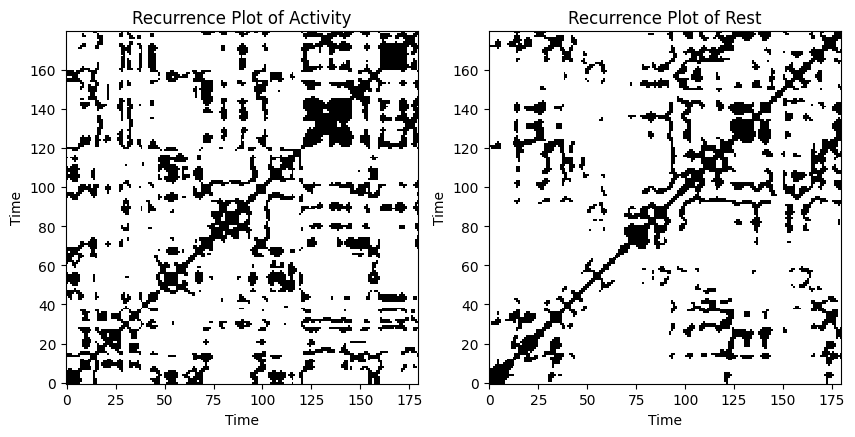

In [216]:
A_signals = np.vstack((x_A, y_A, z_A)).T
R_signals = np.vstack((x_R, y_R, z_A)).T

e = np.std(A_signals) * 1

rp_A = RecurrencePlot(A_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

In [217]:
df[["mu_C1", "mu_C3", "mu_Cz", "mu_C4", "mu_C2", "HRV"]] = (df[["mu_C1", "mu_C3", "mu_Cz", "mu_C4", "mu_C2", "HRV"]] - df[["mu_C1", "mu_C3", "mu_Cz", "mu_C4", "mu_C2", "HRV"]].mean()) / df[["mu_C1", "mu_C3", "mu_Cz", "mu_C4", "mu_C2", "HRV"]].std()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


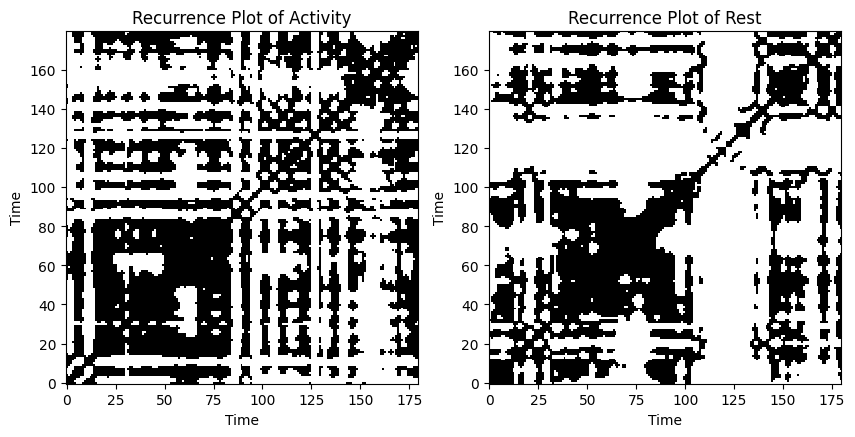

In [220]:
A_signals = np.vstack((df.mu_C1[a:b].values, df.mu_C3[a:b].values, df.mu_Cz[a:b].values, df.mu_C2[a:b].values, df.mu_C4[a:b].values, df.HRV[a:b].values)).T
R_signals = np.vstack((df.mu_C1[c:d].values, df.mu_C3[c:d].values, df.mu_Cz[c:d].values, df.mu_C2[c:d].values, df.mu_C4[c:d].values, df.HRV[c:d].values)).T

e = np.std(A_signals) * 3

rp_A = RecurrencePlot(A_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=1, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


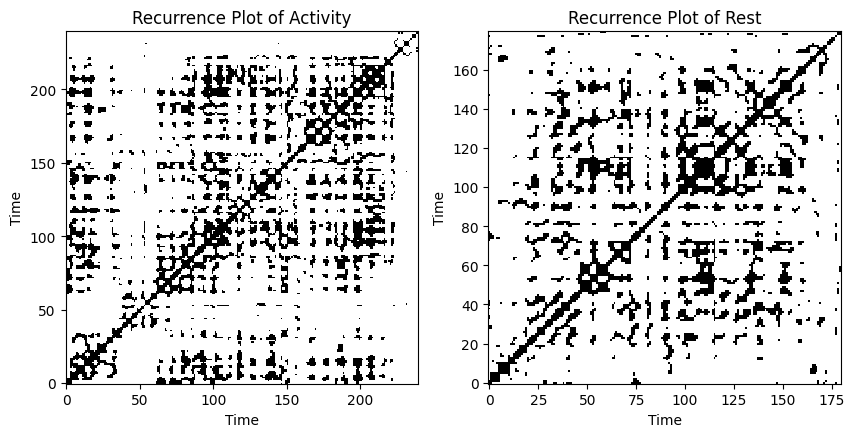

In [46]:
A_signals = np.vstack((df.beta_CP3[a:b].values, df.beta_P3[a:b].values, df.beta_Pz[a:b].values, df.beta_CP4[a:b].values, df.beta_P4[a:b].values)).T
R_signals = np.vstack((df.beta_CP3[c:d].values, df.beta_P3[c:d].values, df.beta_Pz[c:d].values, df.beta_CP4[c:d].values, df.beta_P4[c:d].values)).T

e = np.std(A_signals) * 1.5

rp_A = RecurrencePlot(A_signals, threshold=e, tau=5, epsilon='distance', metric='euclidean')
rp_R = RecurrencePlot(R_signals, threshold=e, tau=5, epsilon='distance', metric='euclidean')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Activity')
plt.xlabel('Time')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
plt.title('Recurrence Plot of Rest')
plt.xlabel('Time')
plt.ylabel('Time')

plt.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


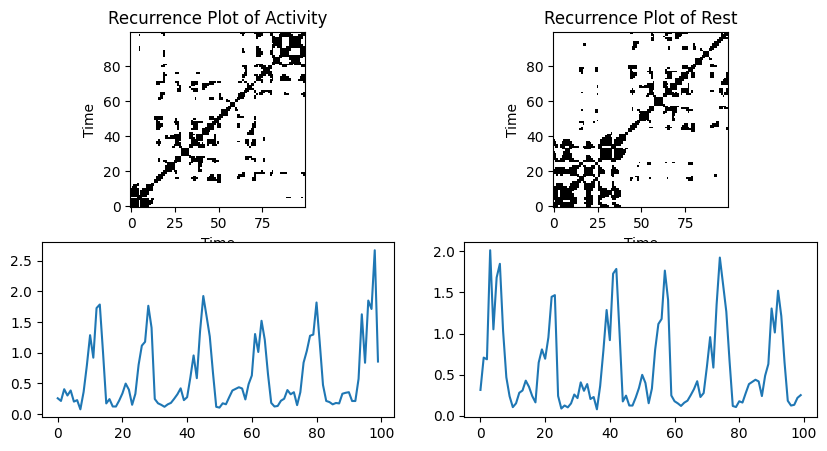

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


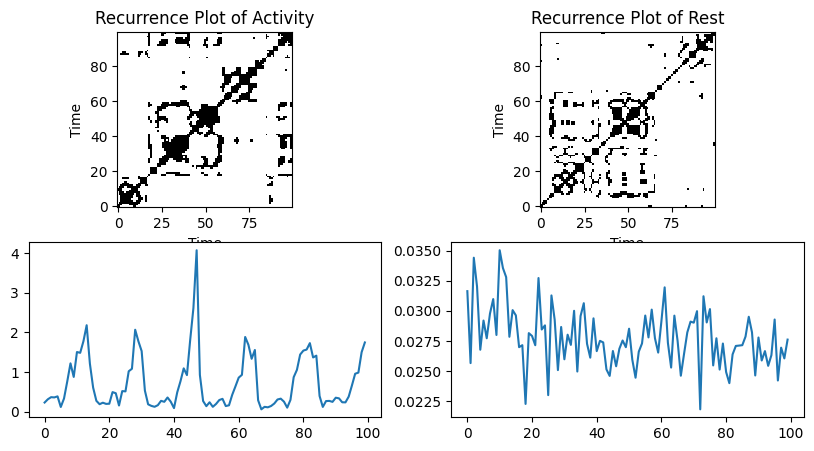

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


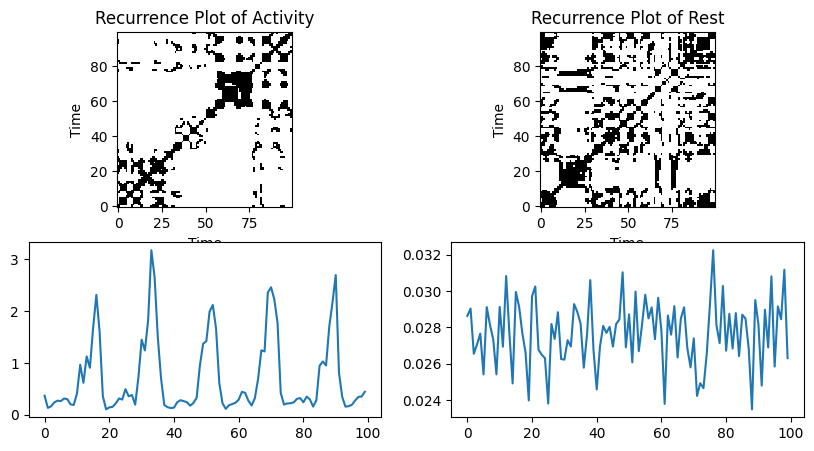

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


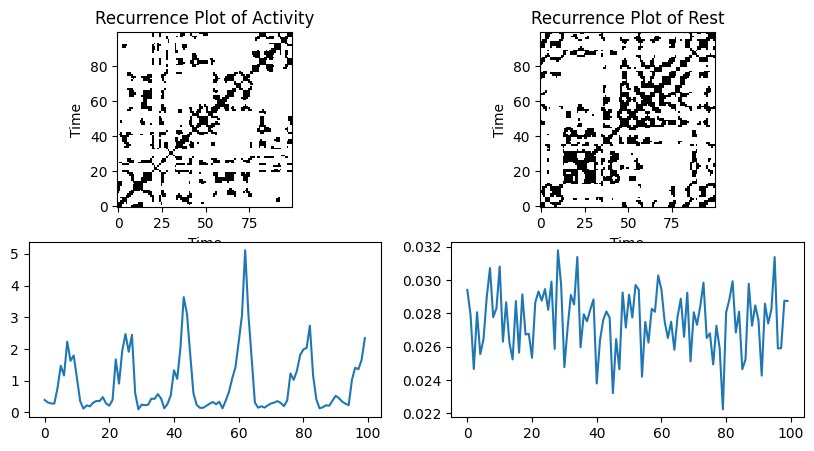

In [47]:
for i in range(len(act)):
        
    c, d = rep[i]
    N = 100
    a, b = act[i]
    c, d = c + N//2, c + N + N//2
    a, b, = a + N//2, a+ N + N//2

    x_A = df.beta_FC3[a:b].values
    y_A = df.beta_FCz[a:b].values
    z_A = df.beta_FC4[a:b].values

    x_R = df.beta_FC3[c:d].values
    y_R = df.beta_FCz[c:d].values
    z_R = df.beta_FC4[c:d].values

    A_signals = np.vstack((x_A, y_A, z_A)).T
    R_signals = np.vstack((x_R, y_R, z_R)).T
    #A_signals = np.vstack((df.mu_C1[a:b].values, df.mu_C3[a:b].values, df.mu_Cz[a:b].values, df.mu_C2[a:b].values, df.mu_C4[a:b].values)).T
    #R_signals = np.vstack((df.mu_C1[c:d].values, df.mu_C3[c:d].values, df.mu_Cz[c:d].values, df.mu_C2[c:d].values, df.mu_C4[c:d].values)).T
    #A_signals = np.vstack((df.beta_CP3[a:b].values, df.beta_P3[a:b].values, df.beta_Pz[a:b].values, df.beta_CP4[a:b].values, df.beta_P4[a:b].values)).T
    #R_signals = np.vstack((df.beta_CP3[c:d].values, df.beta_P3[c:d].values, df.beta_Pz[c:d].values, df.beta_CP4[c:d].values, df.beta_P4[c:d].values)).T
    
    e = np.std(A_signals) * 1
    rp_A = RecurrencePlot(A_signals, threshold=e, tau=6, epsilon='distance', metric='euclidean')
    rp_R = RecurrencePlot(R_signals, threshold=e, tau=6, epsilon='distance', metric='euclidean')

    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Activity')
    plt.xlabel('Time')
    plt.ylabel('Time')
    
    plt.subplot(2, 2, 2)
    plt.imshow(rp_R.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Rest')
    plt.xlabel('Time')
    plt.ylabel('Time')

    plt.subplot(2, 2, 3)

    plt.plot(df.EnvAgo[a:b].values)
    plt.subplot(2, 2, 4)
    
    plt.plot(df.EnvAgo[c:d].values)
    plt.show()

Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...


C:\Users\fercy\AppData\Local\Temp\ipykernel_15840\3703150328.py:17: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



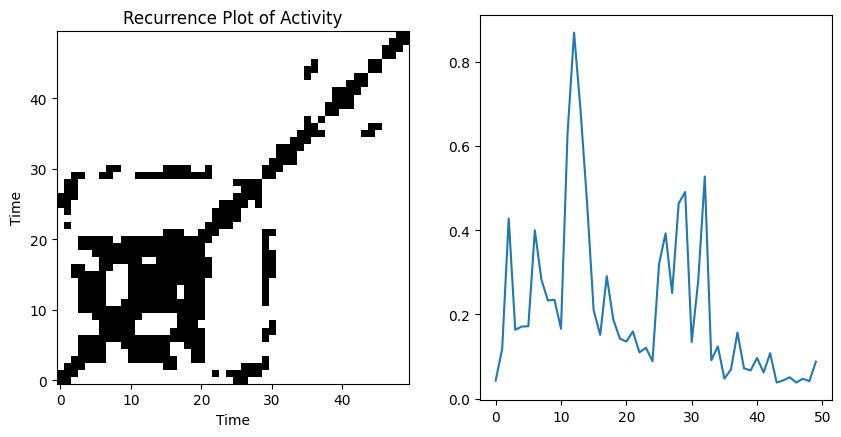

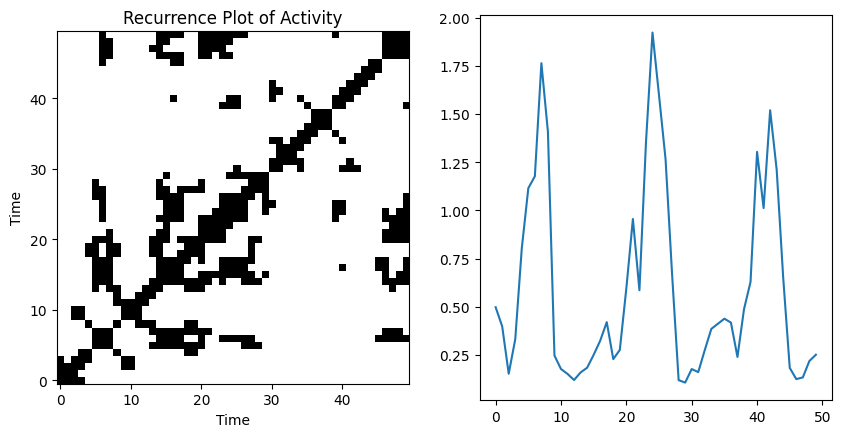

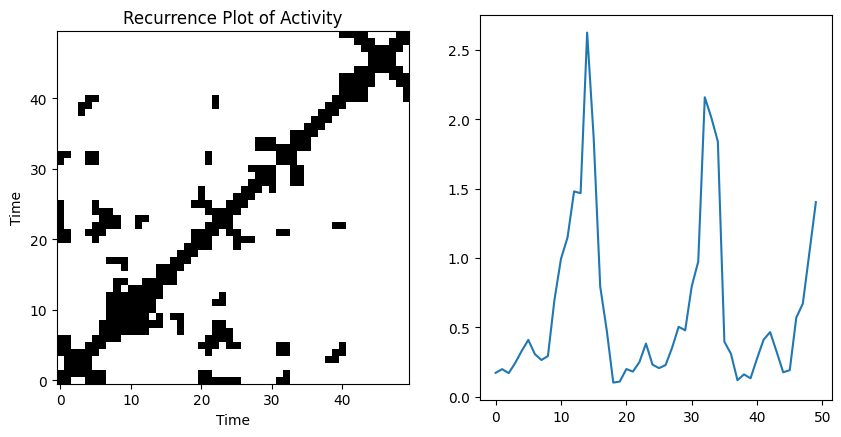

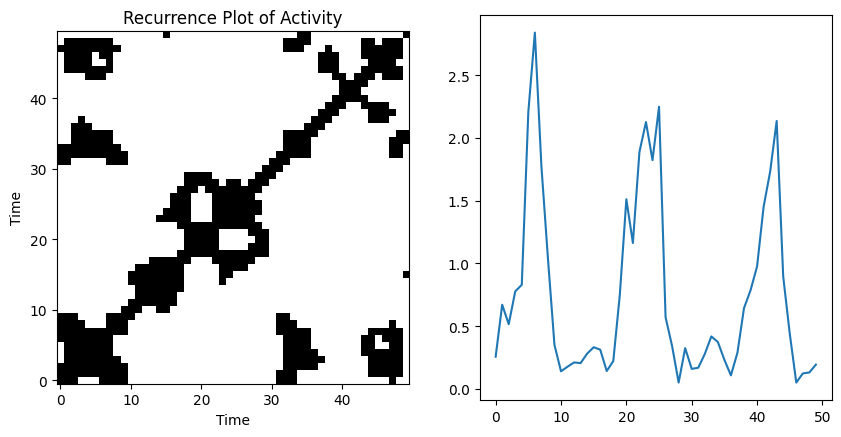

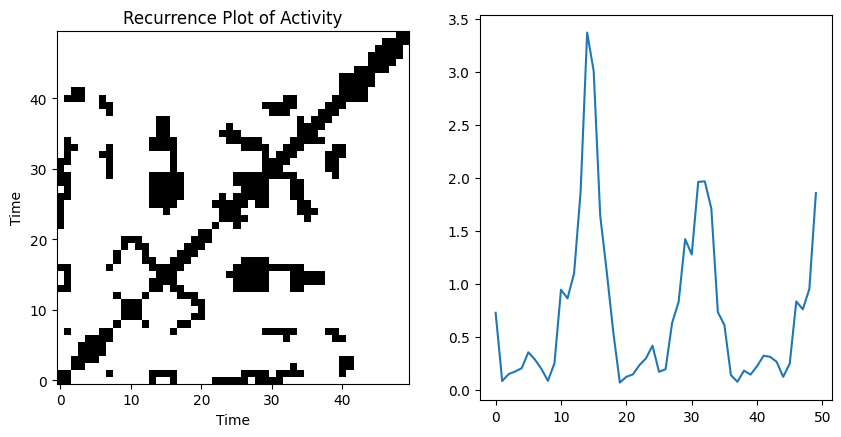

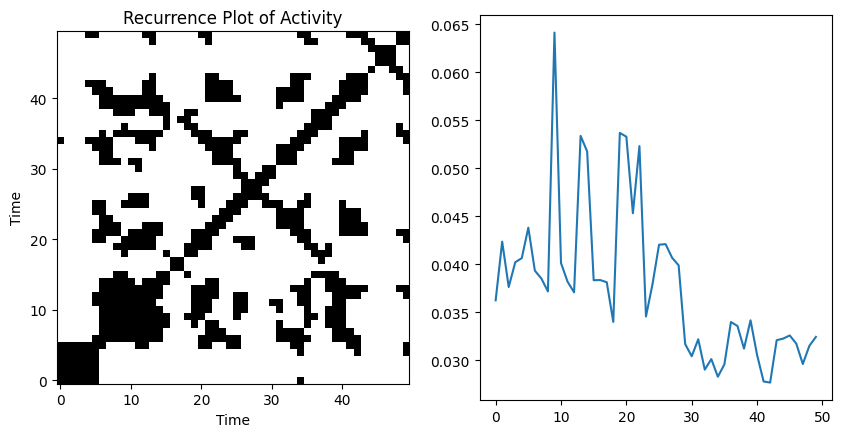

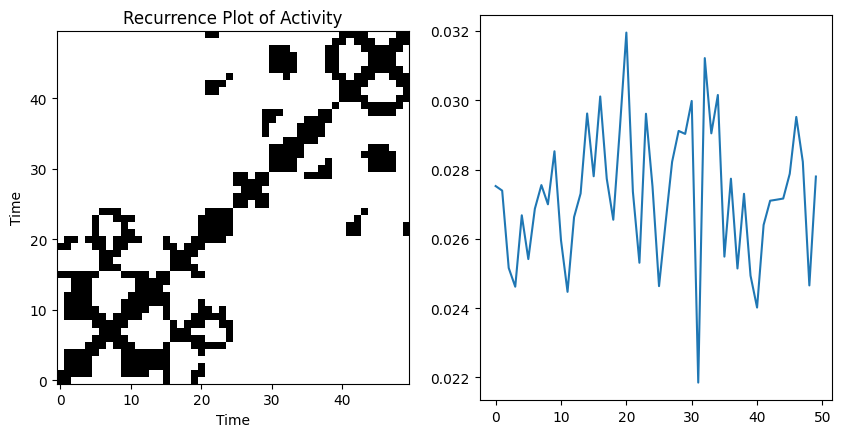

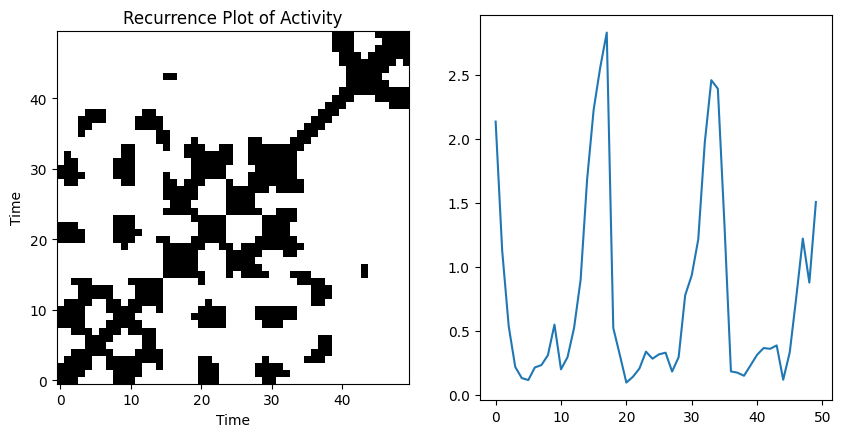

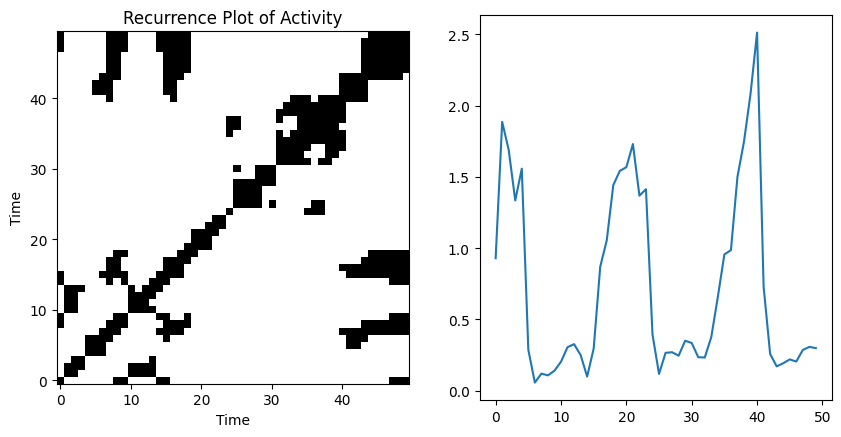

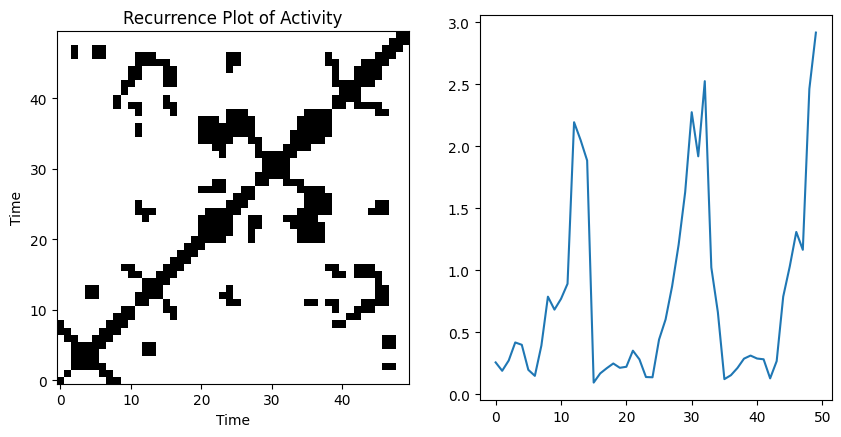

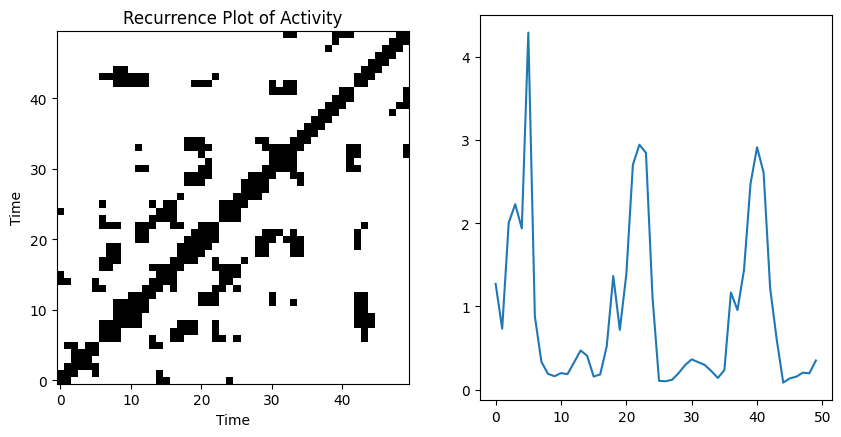

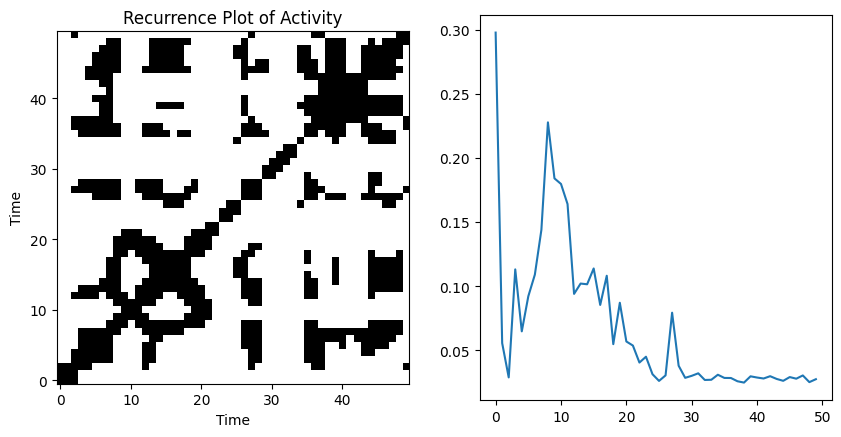

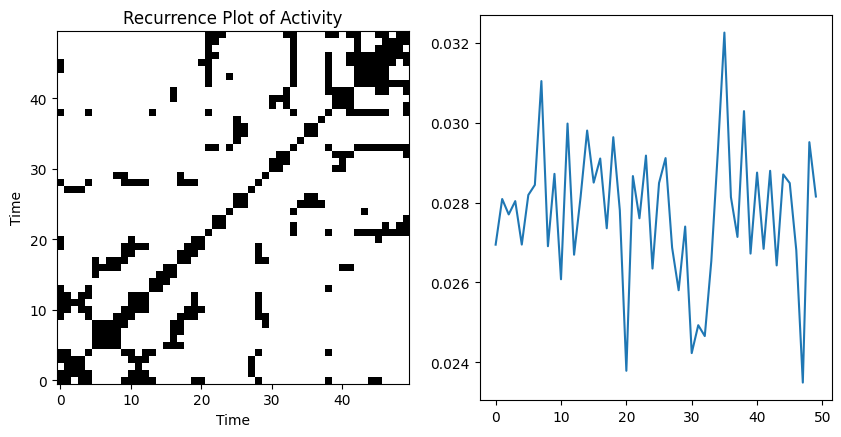

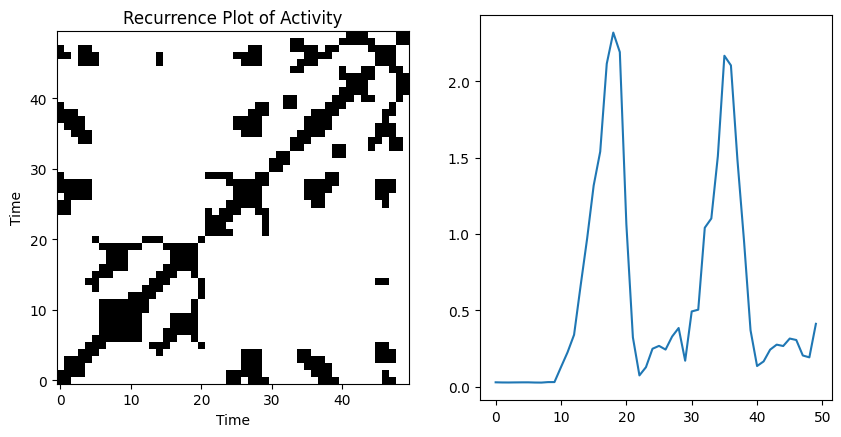

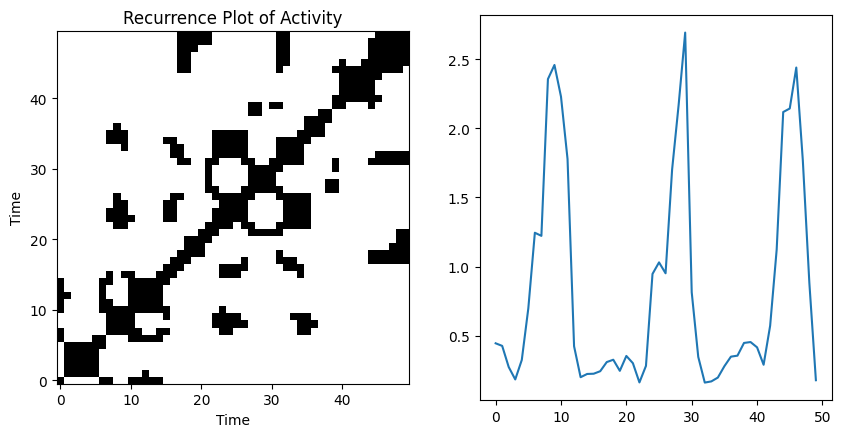

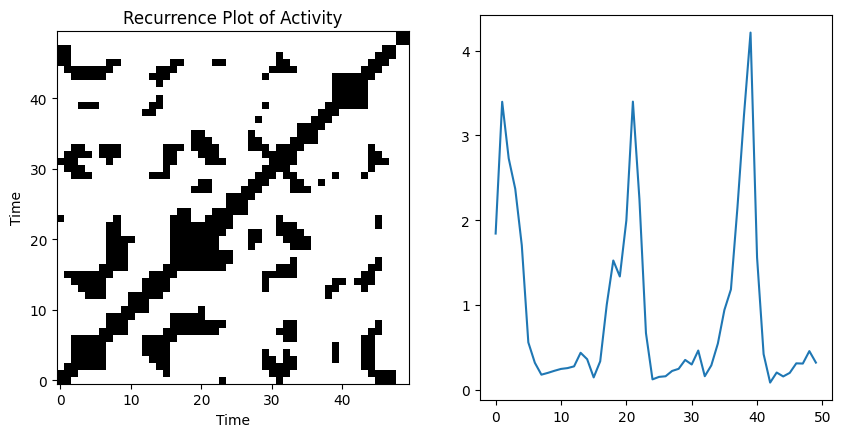

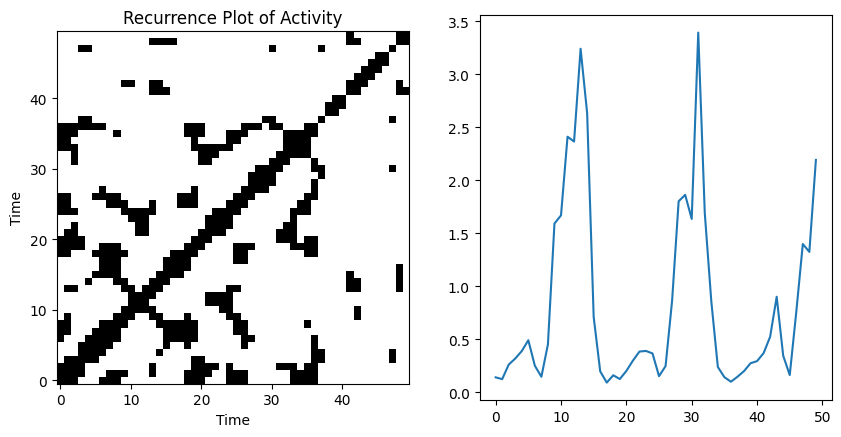

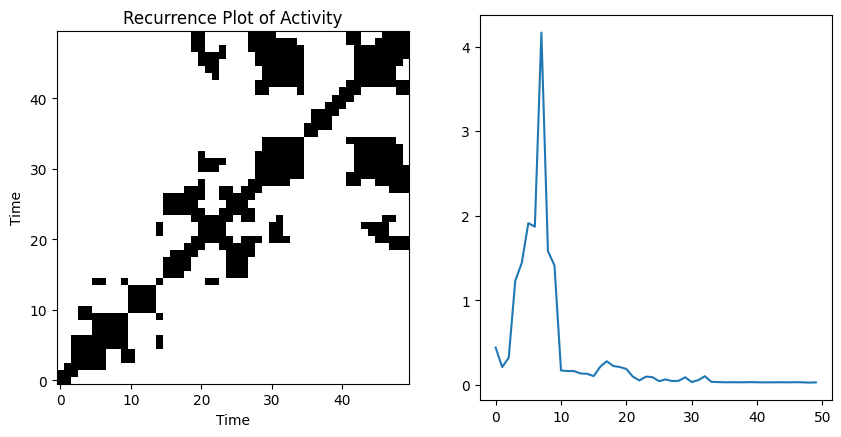

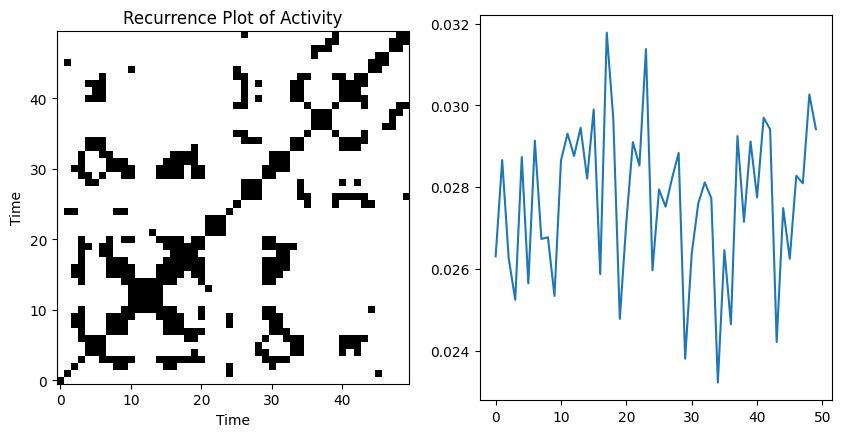

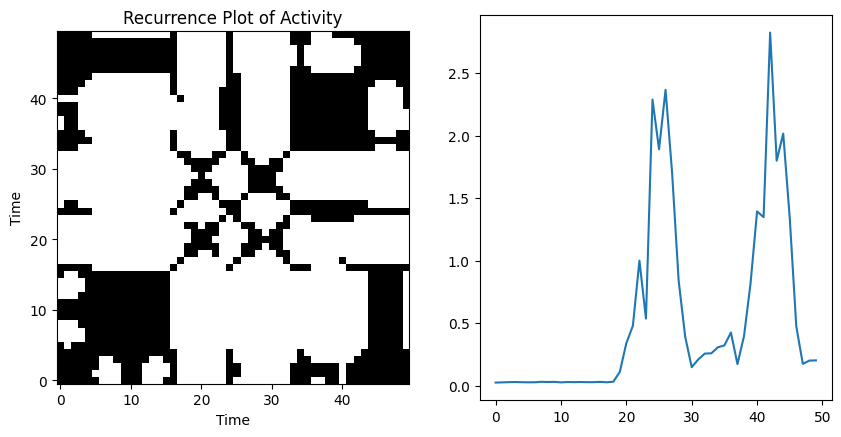

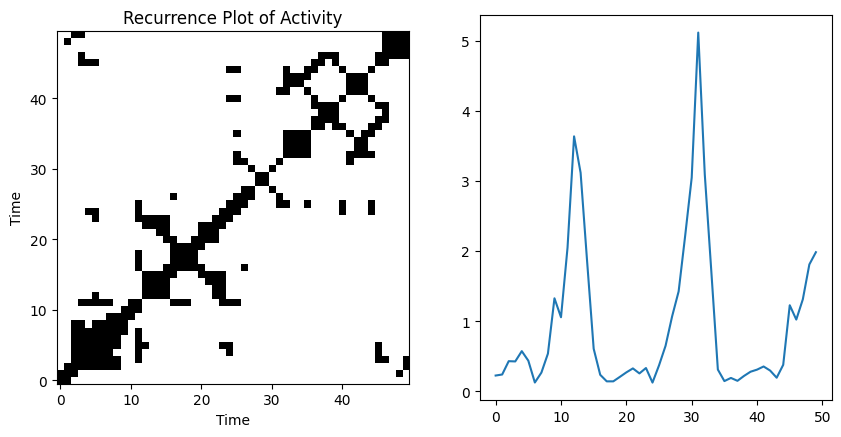

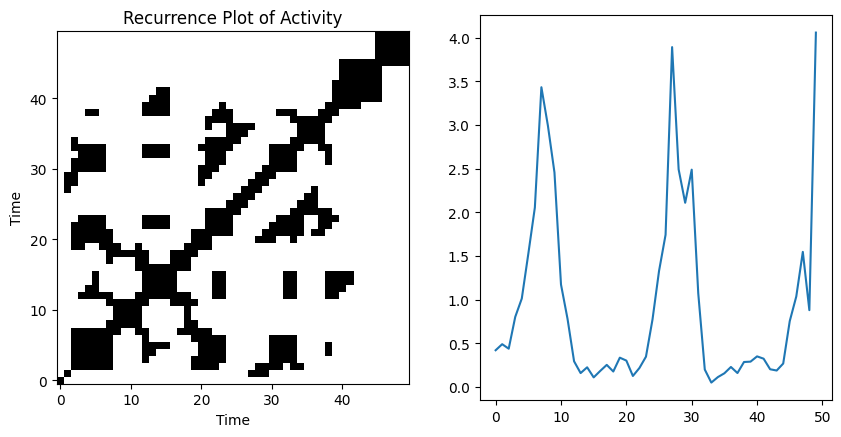

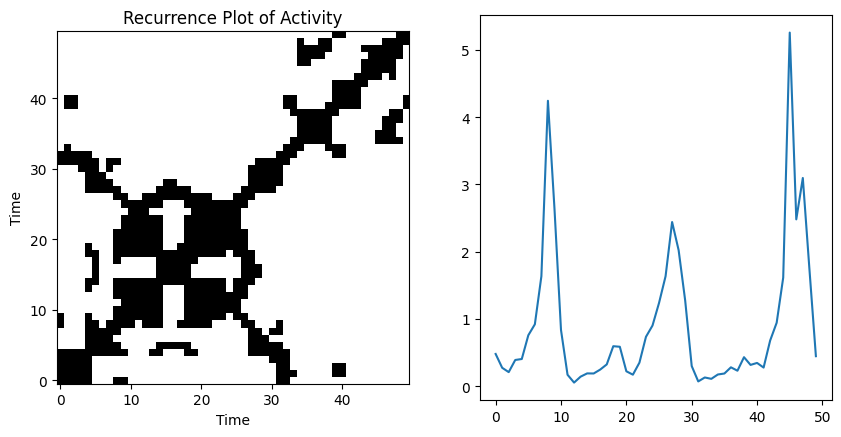

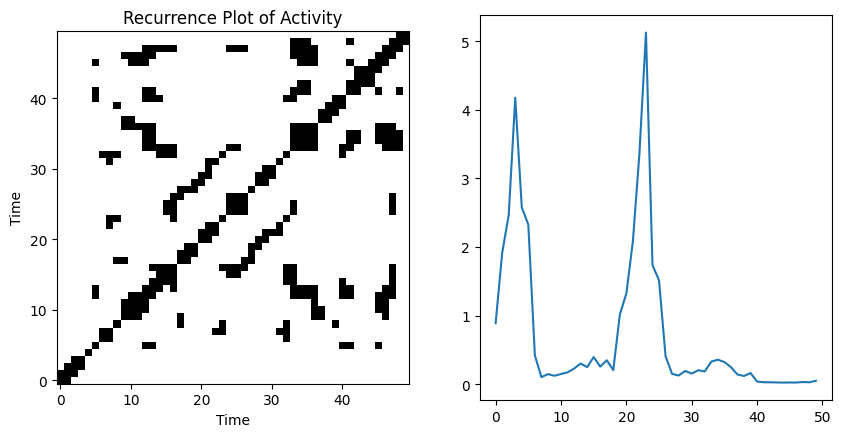

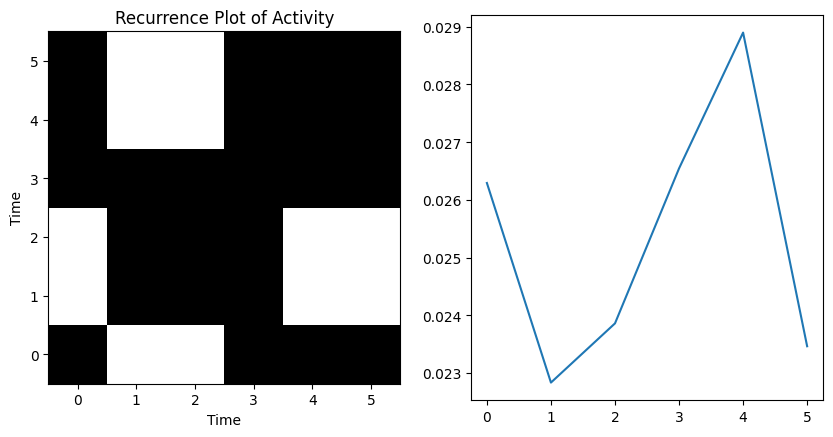

In [48]:
for i in range(0, len(df.Binaria.values), 100):
        
    a = i
    b = i + 50

    x_A = df.beta_FC3[a:b].values
    y_A = df.beta_FCz[a:b].values
    z_A = df.beta_FC4[a:b].values
    x_A = np.log10(x_A)
    y_A = np.log10(y_A)
    z_A = np.log10(z_A)
    A_signals = np.vstack((x_A, y_A, z_A)).T
    #A_signals = np.vstack((df.mu_C1[a:b].values, df.mu_C3[a:b].values, df.mu_Cz[a:b].values, df.mu_C2[a:b].values, df.mu_C4[a:b].values)).T
    e = np.std(A_signals) * 1
    rp_A = RecurrencePlot(A_signals, threshold=e, tau=6, epsilon='distance', metric='euclidean')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rp_A.recurrence_matrix(), origin='lower', cmap='binary', interpolation='none')
    plt.title('Recurrence Plot of Activity')
    plt.xlabel('Time')
    plt.ylabel('Time')
    
    plt.subplot(1, 2, 2)
    plt.plot(df.EnvAgo[a:b].values)
